In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [4]:
#carga de dataset archivo base de datos cliente
dataset = pd.read_csv("C:/Users/hevas/Downloads/lab5_statistical/lab5/Live.csv", sep=',')
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


# 1) Valide si la columna status_id vale la pena mantenerla en el dataset

In [52]:
dataset.status_id.count()

7050

In [51]:
dataset.status_id.drop_duplicates().count()

6997

In [53]:
7050-6997

53

In [55]:
#eliminamos la columna statu_id ya que se repiten muy pocas veces en el dataset y se podria interpretar como un correlativo
#que no necesitamos para este analisis
dataset.drop(['status_id'], axis='columns', inplace=True)

# 2) Realice un análisis estadístico de cada variable dentro del dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [6]:
dataset.shape

(7050, 16)

In [7]:
dataset.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [35]:
#eliminamos las columnas 1,2,3,4 ya que no son utiles en el dataset
dataset.drop(['Column1','Column2','Column3','Column4'], axis='columns', inplace=True)

In [36]:
dataset.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


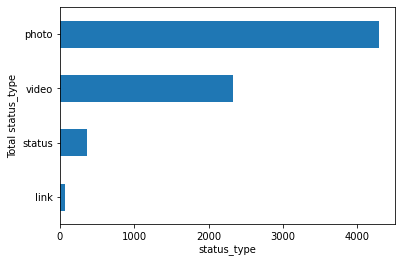

In [12]:
dataset['status_type'].value_counts().sort_values(ascending=True).plot.barh()
plt.ylabel("Total status_type")
plt.xlabel("status_type")
plt.show()

In [41]:
dataset

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


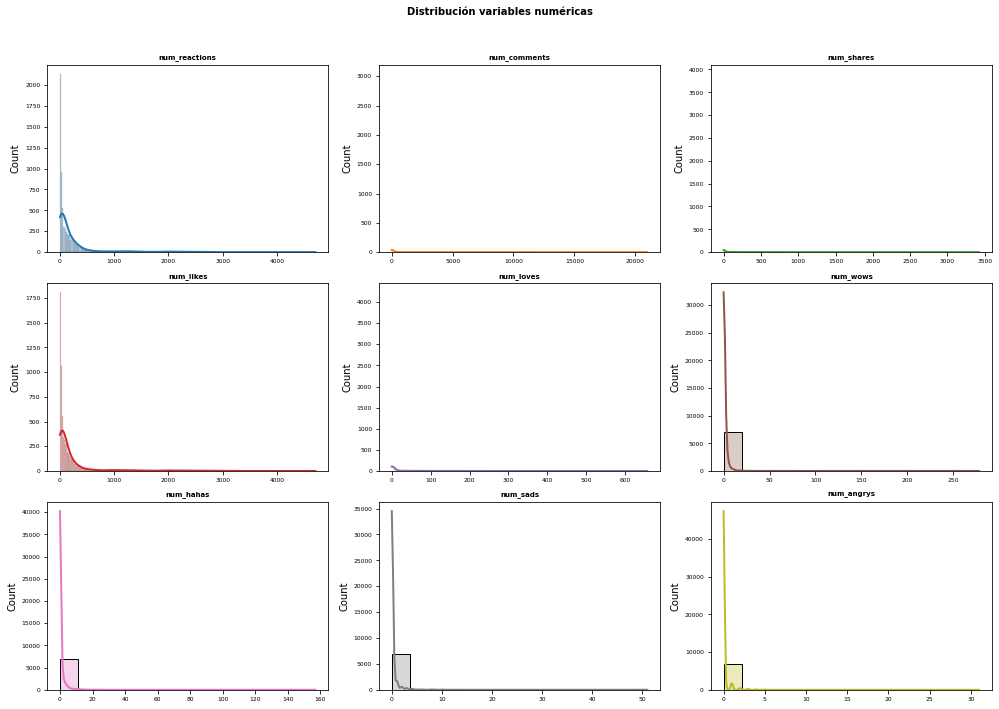

In [44]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
axes = axes.flat
columnas_numeric = dataset.select_dtypes(include=['float64', 'int']).columns
#columnas_numeric = columnas_numeric.drop('status_id')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = dataset,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

<AxesSubplot:xlabel='status_type', ylabel='num_reactions'>

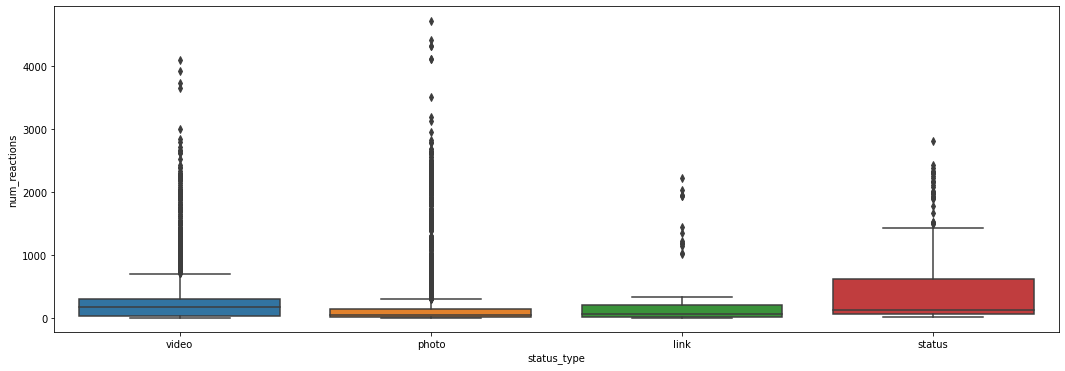

In [27]:
#diagrama de cajas por numero status_type y reacciones
plt.figure(figsize=(18,6))
sns.boxplot(x="status_type",y="num_reactions", data=dataset)

<AxesSubplot:xlabel='status_type', ylabel='num_shares'>

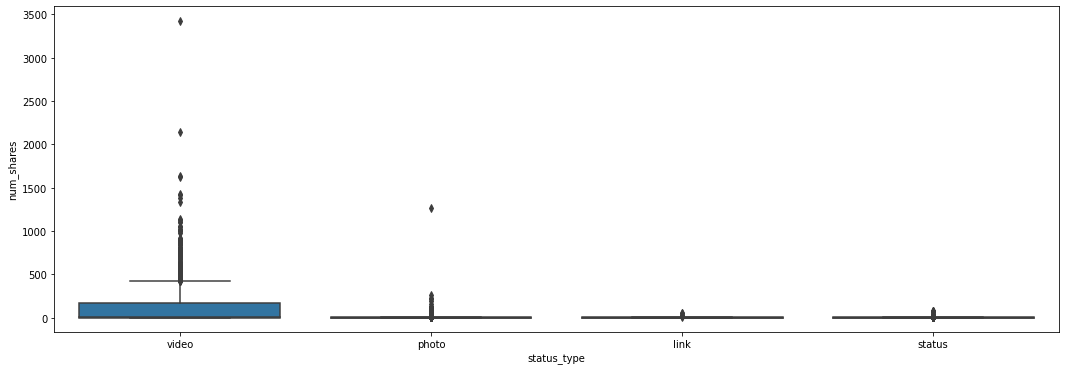

In [28]:
#diagrama de cajas por status_type y num_shares
plt.figure(figsize=(18,6))
sns.boxplot(x="status_type",y="num_shares", data=dataset)

<AxesSubplot:xlabel='status_type', ylabel='num_likes'>

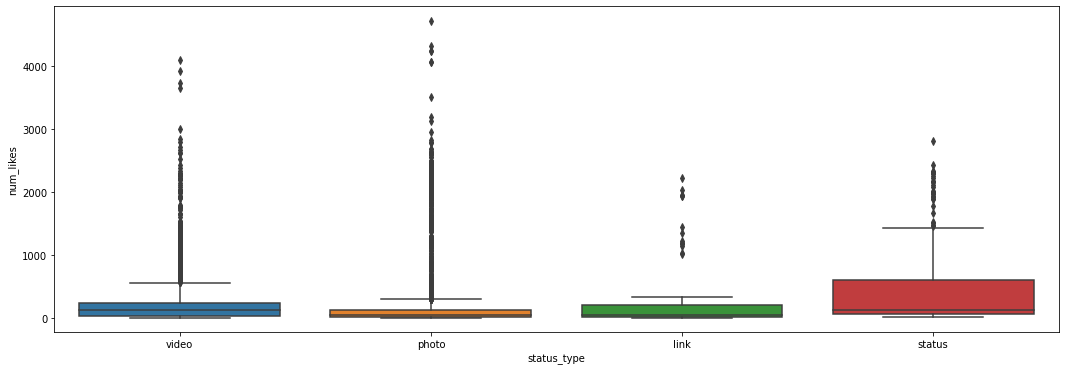

In [29]:
#diagrama de cajas por status_type y num_likes
plt.figure(figsize=(18,6))
sns.boxplot(x="status_type",y="num_likes", data=dataset)

<AxesSubplot:xlabel='status_type', ylabel='num_loves'>

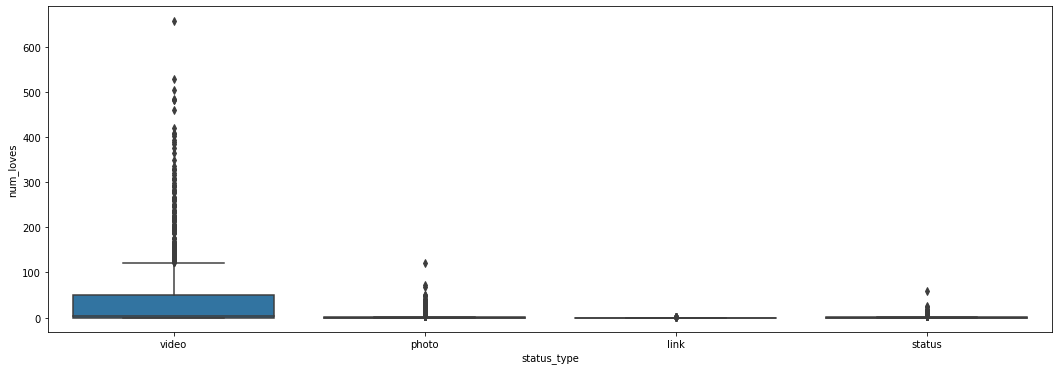

In [30]:
#diagrama de cajas por status_type y num_loves
plt.figure(figsize=(18,6))
sns.boxplot(x="status_type",y="num_loves", data=dataset)

<AxesSubplot:xlabel='status_type', ylabel='num_wows'>

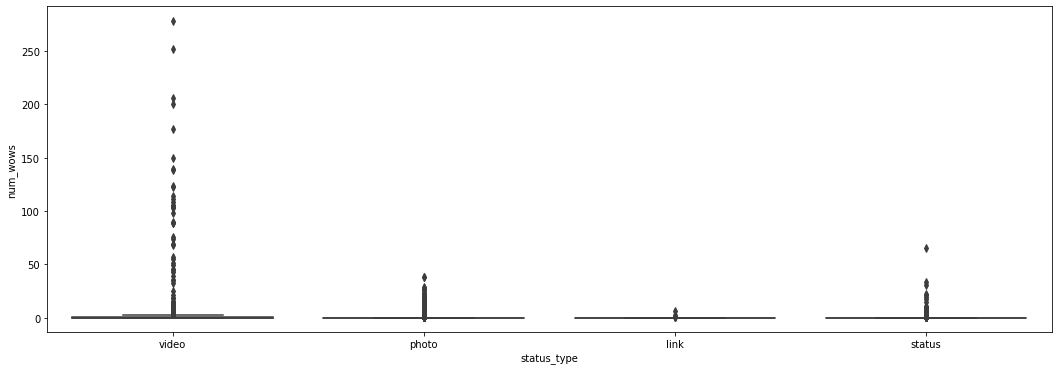

In [45]:
#diagrama de cajas por status_type y num_wows
plt.figure(figsize=(18,6))
sns.boxplot(x="status_type",y="num_wows", data=dataset)

<AxesSubplot:xlabel='status_type', ylabel='num_hahas'>

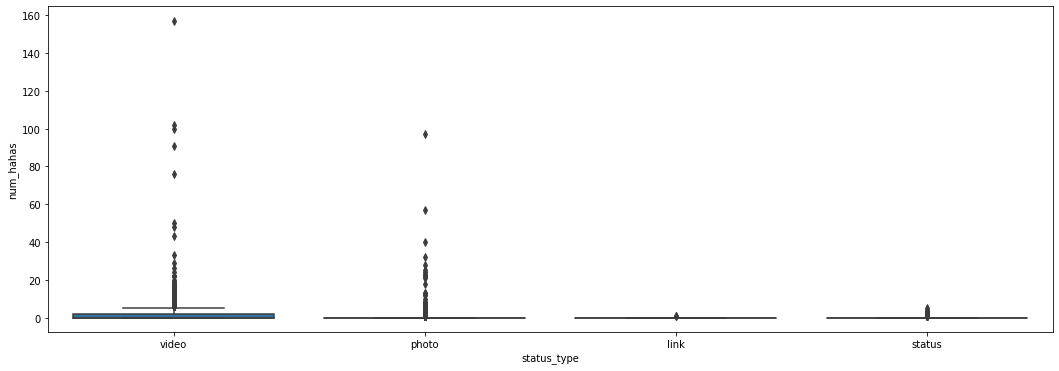

In [46]:
#diagrama de cajas por status_type y num_hahas
plt.figure(figsize=(18,6))
sns.boxplot(x="status_type",y="num_hahas", data=dataset)

<AxesSubplot:xlabel='status_type', ylabel='num_sads'>

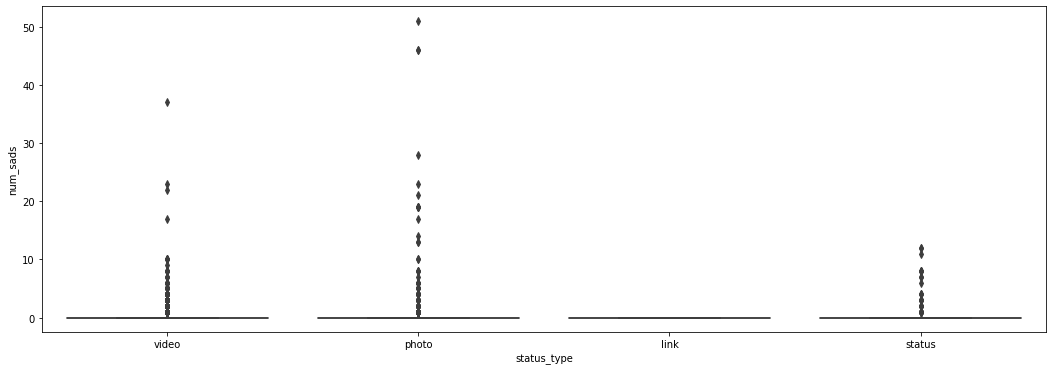

In [47]:
#diagrama de cajas por status_type y num_sads
plt.figure(figsize=(18,6))
sns.boxplot(x="status_type",y="num_sads", data=dataset)

<AxesSubplot:xlabel='status_type', ylabel='num_angrys'>

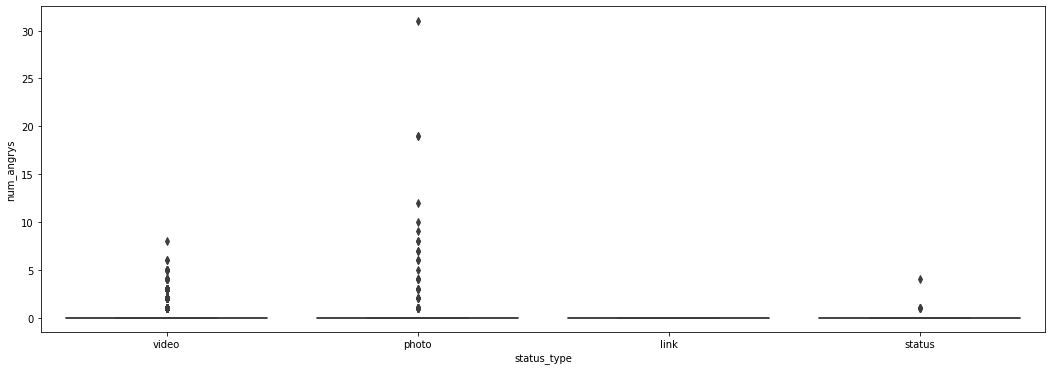

In [48]:
#diagrama de cajas por status_type y num_angrys
plt.figure(figsize=(18,6))
sns.boxplot(x="status_type",y="num_angrys", data=dataset)

# 3) Muestre una gráfica de serie temporal (debe ordenar las fechas) para cada tipo de entidad:

In [61]:
dataset.status_published.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7050 entries, 0 to 7049
Series name: status_published
Non-Null Count  Dtype 
--------------  ----- 
7050 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [62]:
#convertir columna status_published a tipo fecha(datetime64) ya que se encuentra como object
dataset['status_published'] = dataset['status_published'].astype('datetime64[ns]')

In [63]:
dataset.status_published.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7050 entries, 0 to 7049
Series name: status_published
Non-Null Count  Dtype         
--------------  -----         
7050 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 55.2 KB


In [64]:
#enviamos la columan date como index
dataset.set_index("status_published", inplace=True)
dataset

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_published,,,,,,,,,,
2018-04-22 06:00:00,video,529,512,262,432,92,3,1,1,0
2018-04-21 22:45:00,photo,150,0,0,150,0,0,0,0,0
2018-04-21 06:17:00,video,227,236,57,204,21,1,1,0,0
2018-04-21 02:29:00,photo,111,0,0,111,0,0,0,0,0
2018-04-18 03:22:00,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2016-09-24 02:58:00,photo,89,0,0,89,0,0,0,0,0
2016-09-23 11:19:00,photo,16,0,0,14,1,0,1,0,0
2016-09-21 23:03:00,photo,2,0,0,1,1,0,0,0,0


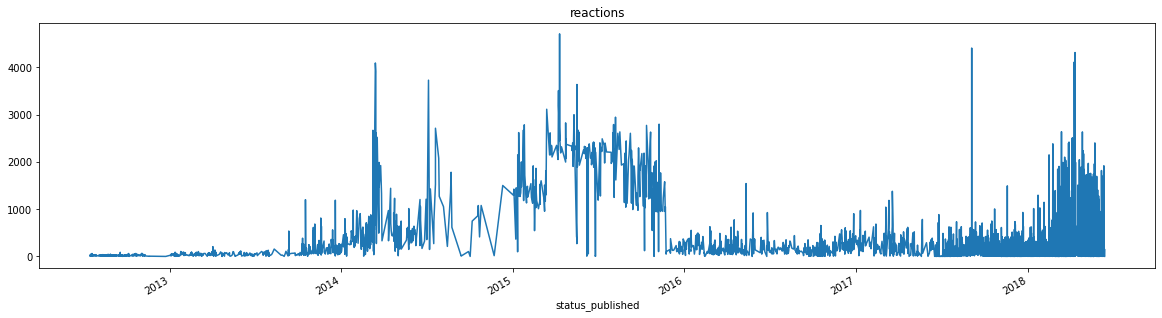

In [78]:
dataset.num_reactions.plot(figsize=(20,5), title = "reactions")
plt.show()

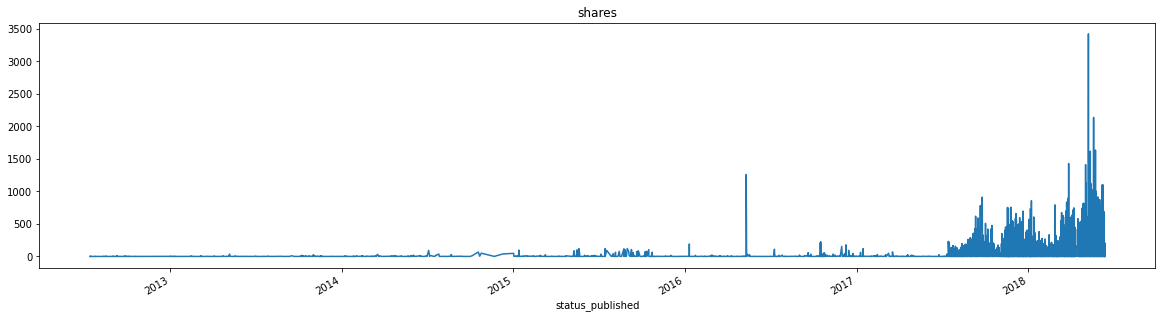

In [79]:
dataset.num_shares.plot(figsize=(20,5), title = "shares")
plt.show()

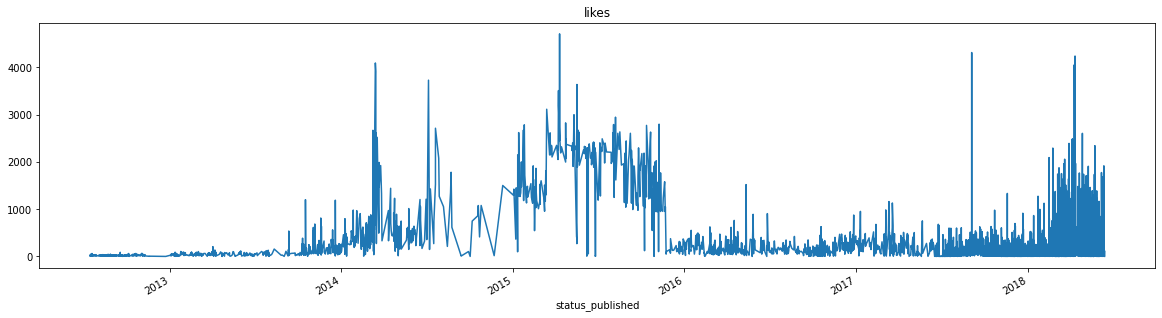

In [80]:
dataset.num_likes.plot(figsize=(20,5), title = "likes")
plt.show()

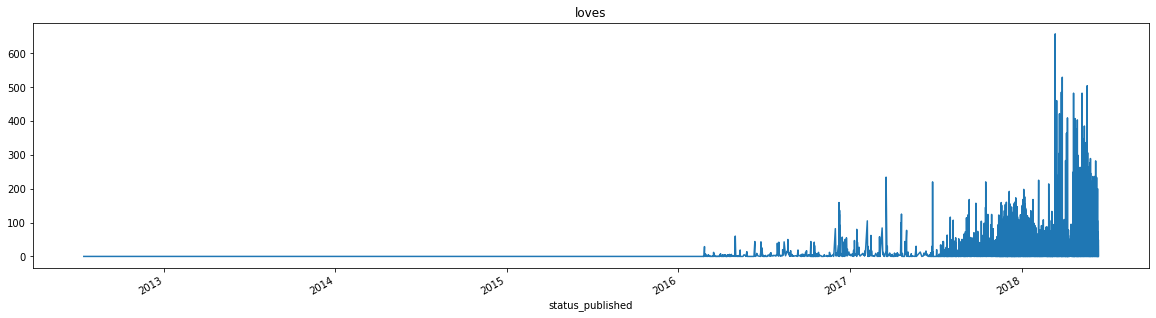

In [81]:
dataset.num_loves.plot(figsize=(20,5), title = "loves")
plt.show()

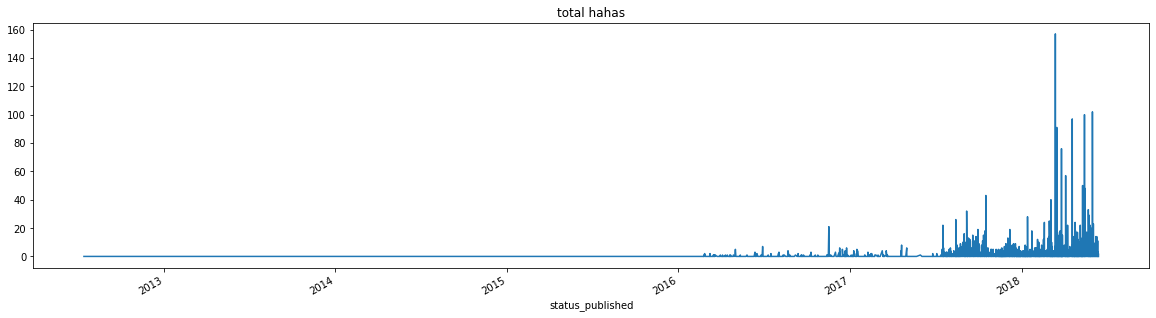

In [82]:
dataset.num_hahas.plot(figsize=(20,5), title = "total hahas")
plt.show()

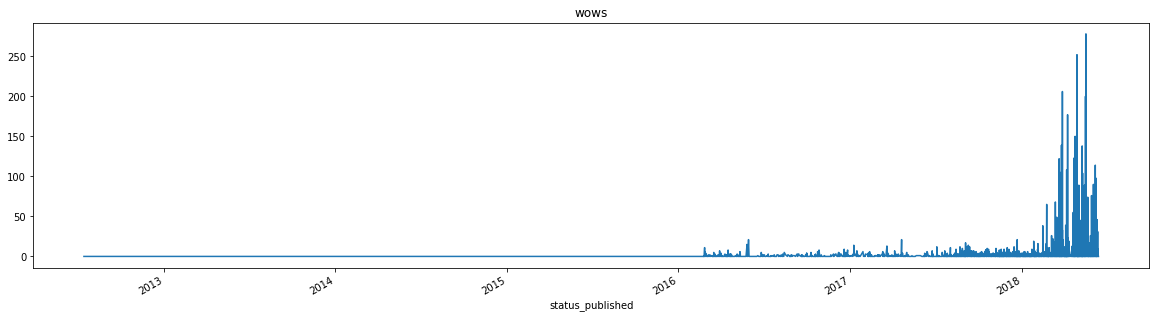

In [83]:
dataset.num_wows.plot(figsize=(20,5), title = "wows")
plt.show()

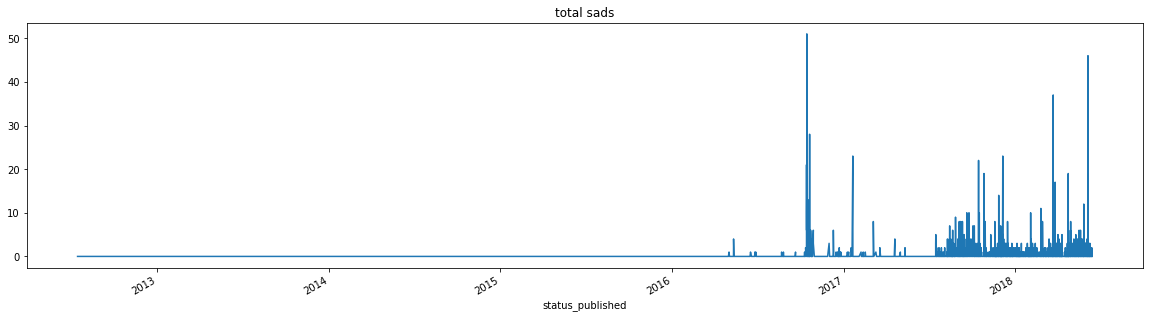

In [84]:
dataset.num_sads.plot(figsize=(20,5), title = "total sads")
plt.show()

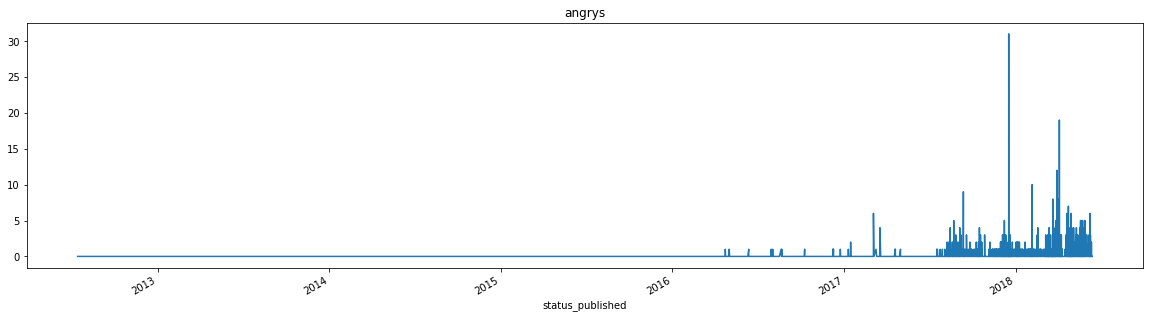

In [85]:
dataset.num_angrys.plot(figsize=(20,5), title = "angrys")
plt.show()